# 1. Settings

In [2]:
import sys
from qutip_simulation_functions import *
import numpy as np
import qutip as qt


%matplotlib inline

In [3]:
nq = 10
g = qt.basis(nq,0)
e = qt.basis(nq,1)
f = qt.basis(nq, 2)
h = qt.basis(nq, 3)

psi0 = g

b = qt.destroy(nq)

qubit_x = b + b.dag()
qubit_y = -1j * (b - b.dag())
qubit_z = 2 * b.dag() * b - qt.qeye(nq)
g_state_projector = g * g.dag()
e_state_projector = e * e.dag()
f_state_projector = f * f.dag()

e_ops = [qubit_x, qubit_y, qubit_z, g_state_projector, e_state_projector, f_state_projector]
c_ops = []

In [18]:
h_bar = 1
alpha_mhz = 347.2
# qubit_frequency_ghz = 2 * np.pi * 5
alpha = 2 * np.pi * alpha_mhz / 10000 # 200 MHz Our time unit is 0.1ns -> 10GHz for the frequency.

transmon_hamiltonian = - h_bar * alpha / 2 * b.dag() * b.dag() * b * b

X Gate Fidelity:  0.9957267023375954


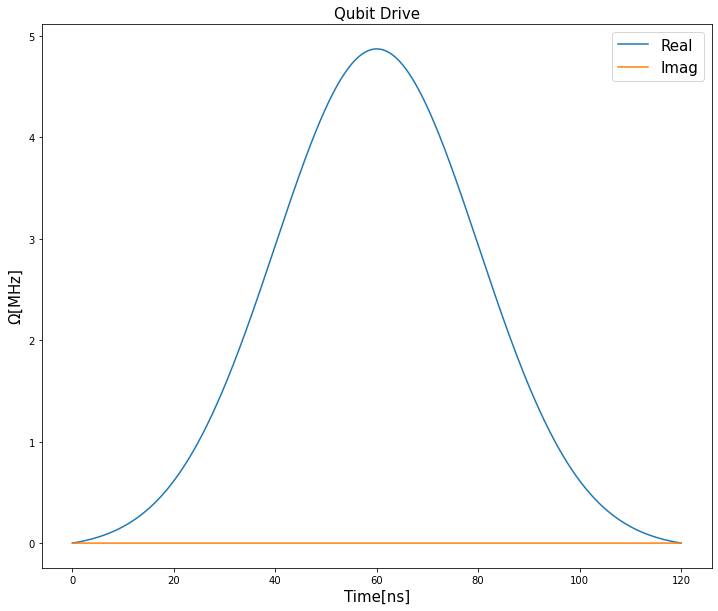

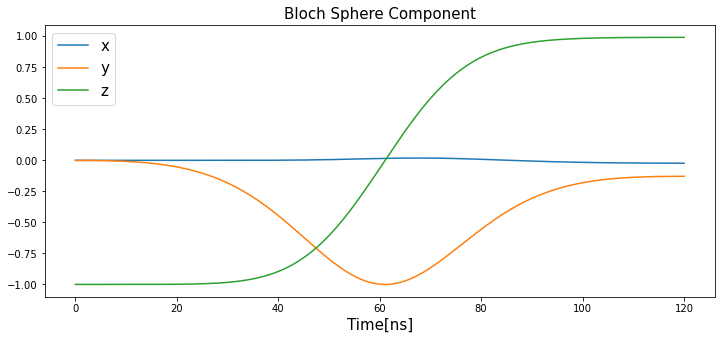

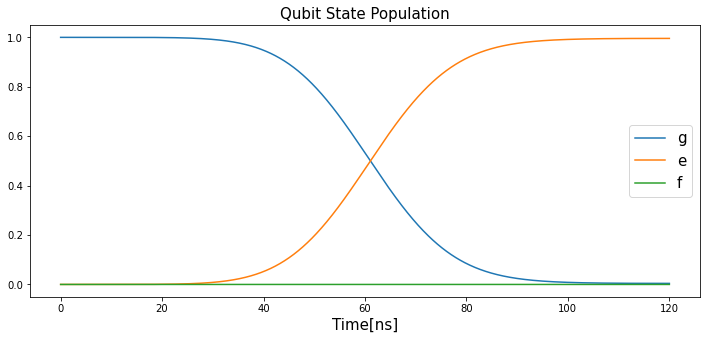

In [19]:
# 100ns

pulse_length_ns = 120
chop = 6

pulse_sigma_ns = pulse_length_ns/chop

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

X Gate Fidelity:  0.9954402899683046


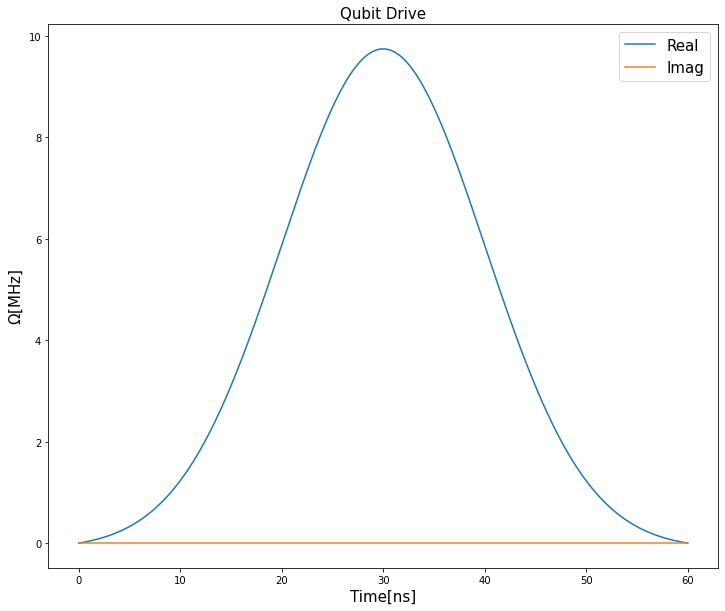

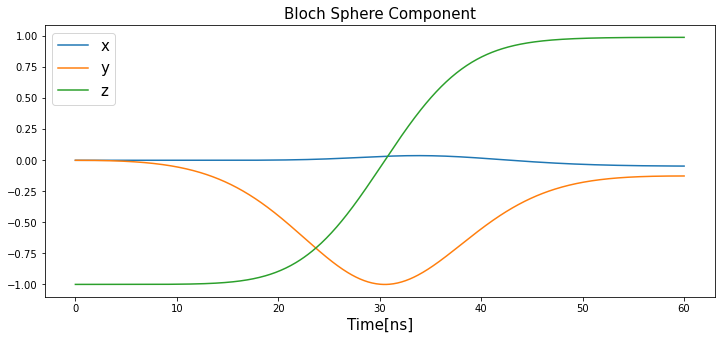

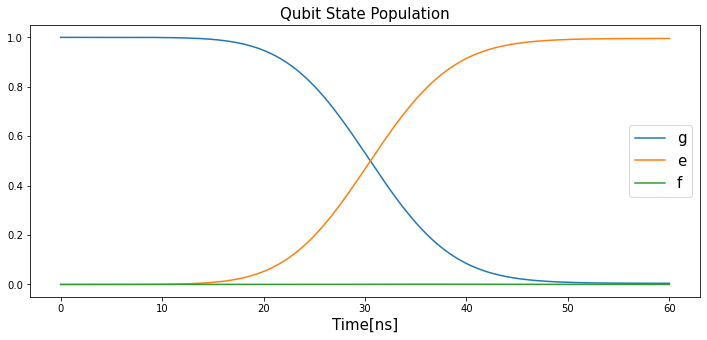

In [20]:
# 60ns

pulse_length_ns = 60
chop = 6

pulse_sigma_ns = pulse_length_ns/chop

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

X Gate Fidelity:  0.9939657316867373


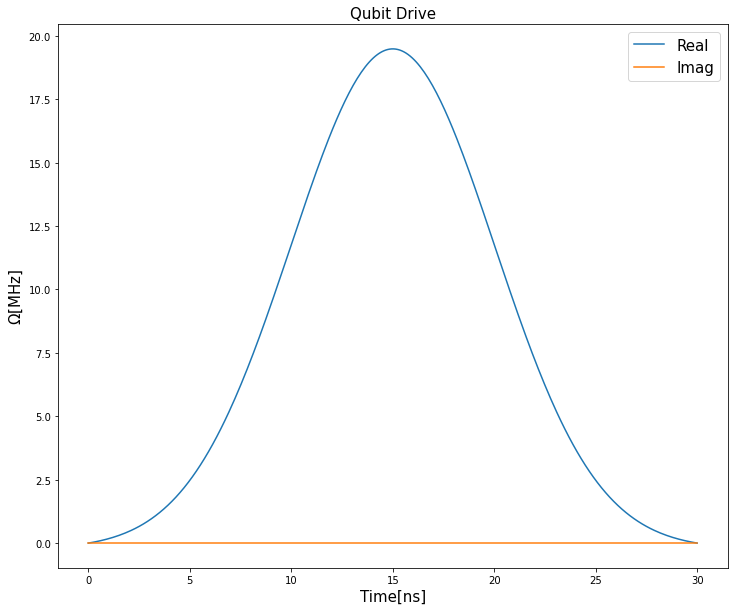

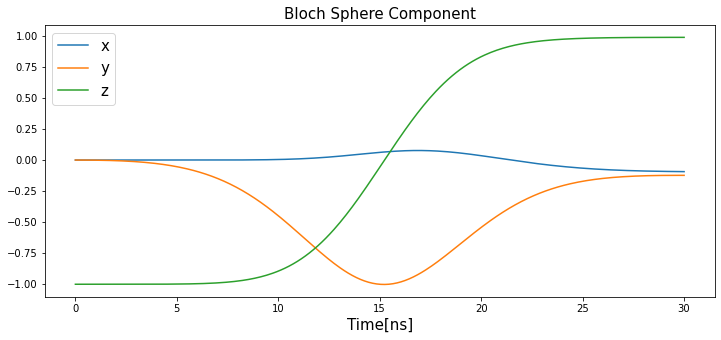

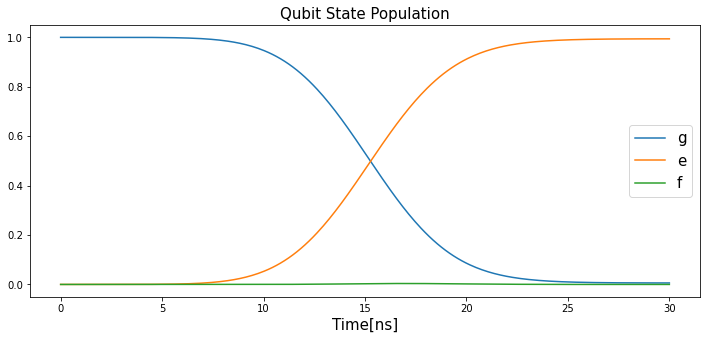

In [21]:
# 30ns

pulse_length_ns = 30
chop = 6

pulse_sigma_ns = pulse_length_ns/chop

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

X Gate Fidelity:  0.9912610118993709


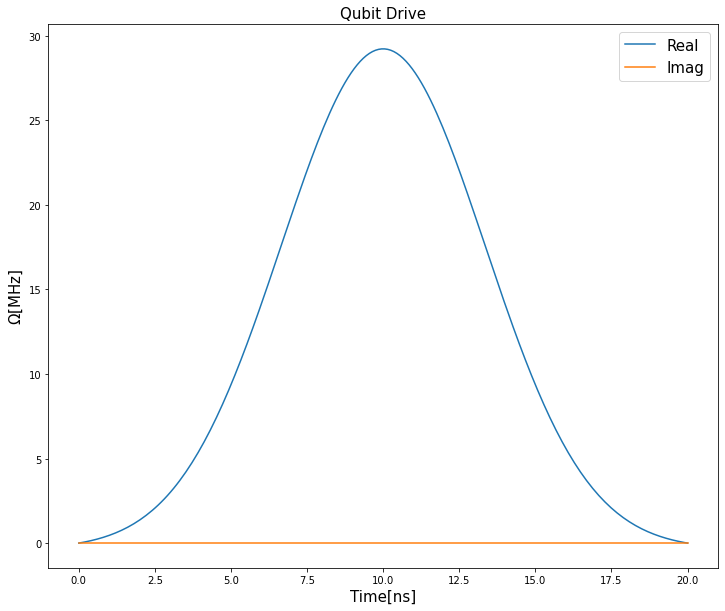

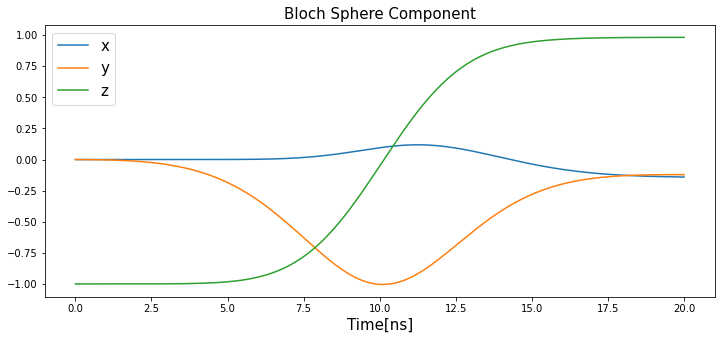

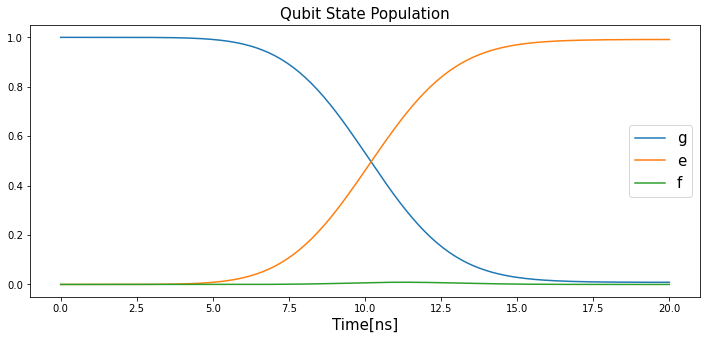

In [22]:
# 20ns

pulse_length_ns = 20
chop = 6

pulse_sigma_ns = pulse_length_ns/chop

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

X Gate Fidelity:  0.9749453765558852


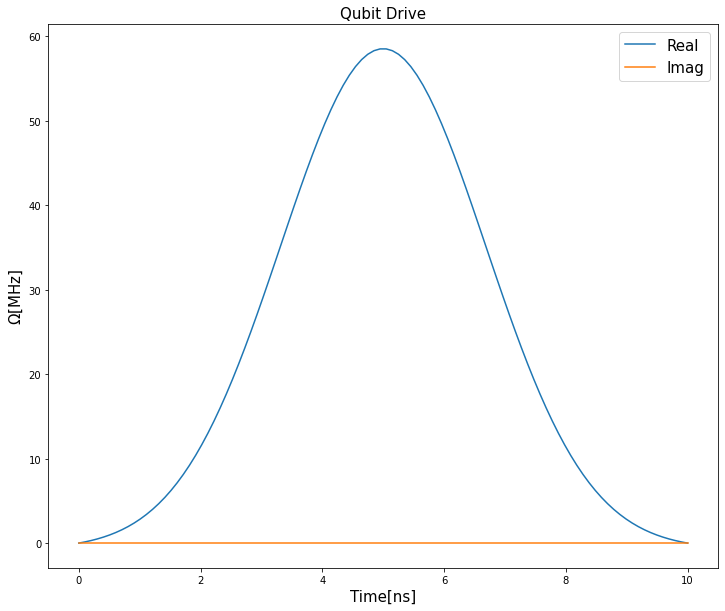

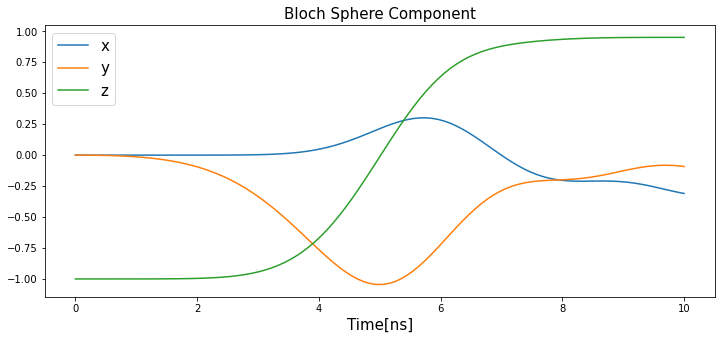

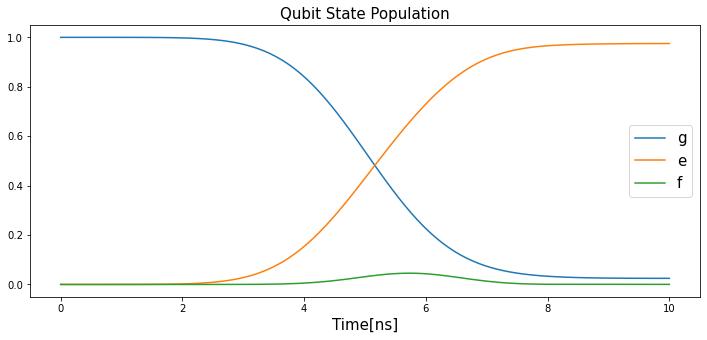

In [23]:
# 10ns

pulse_length_ns = 10
chop = 6

pulse_sigma_ns = pulse_length_ns/chop

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega_100_ns = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
H_100_ns = driven_hamiltonian(omega=omega_100_ns, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(H_100_ns,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

X Gate Fidelity:  0.7976267185006994


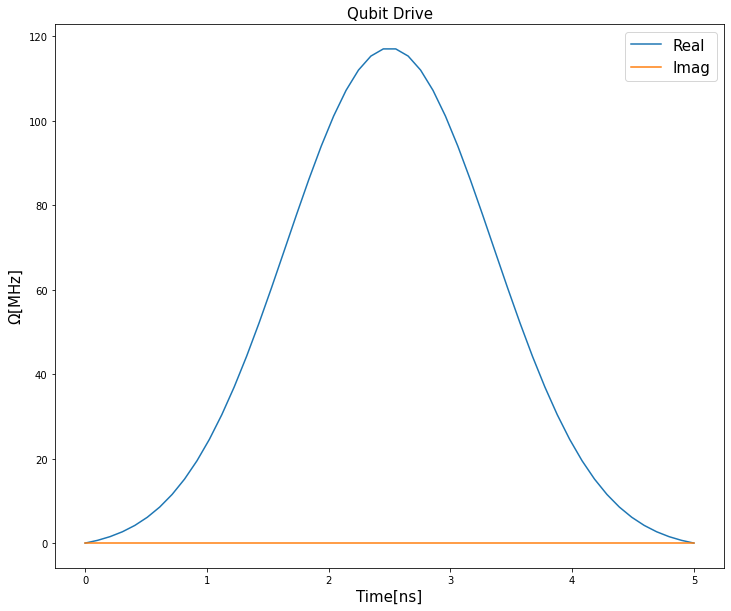

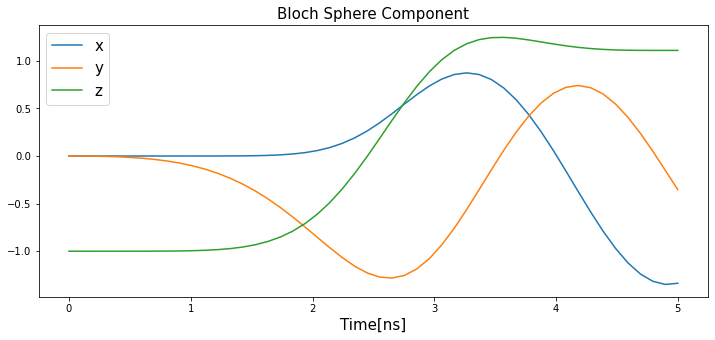

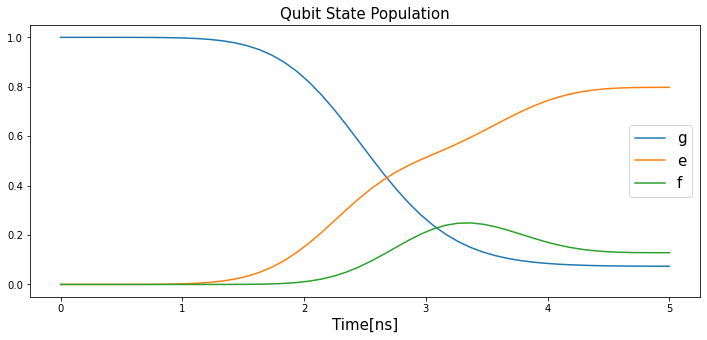

In [24]:
# 5ns

pulse_length_ns = 5
chop = 6

pulse_sigma_ns = pulse_length_ns/chop

tlist = np.linspace(0, pulse_length_ns*10, pulse_length_ns*10)
omega = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])

X Gate Fidelity:  0.9096570334724123


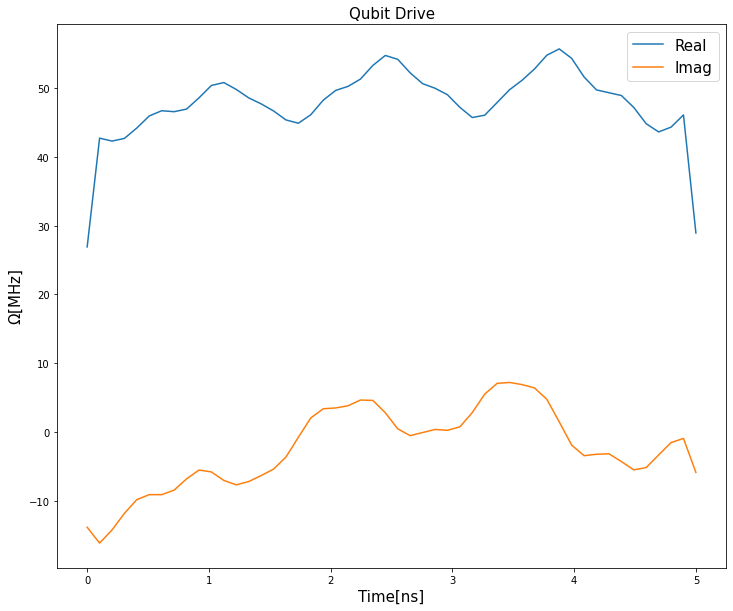

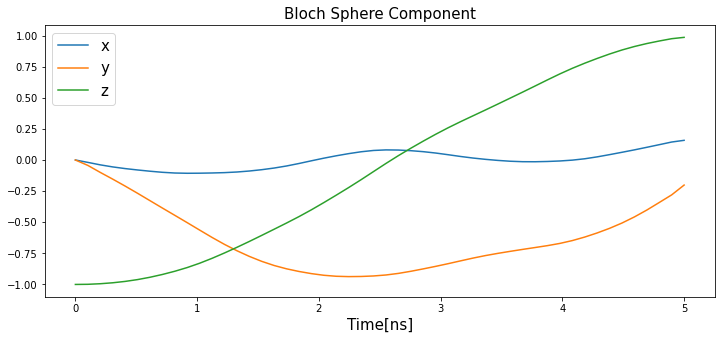

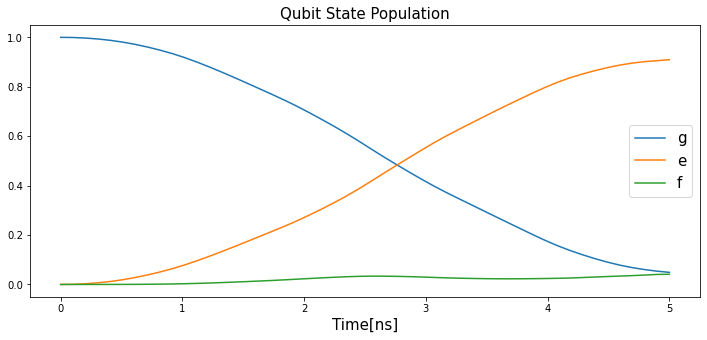

In [26]:
qoc_data = np.genfromtxt("my_data.csv", dtype=complex)
omega = qoc_data/5
tlist = np.linspace(0, len(omega), len(omega))
pi_hamiltonian = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(pi_hamiltonian,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plist = [res.expect[3], res.expect[4], res.expect[5]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)
plot_population(tlist=tlist, p_list=plist)
print("X Gate Fidelity: ", plist[1][-1])